In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

import warnings
warnings.filterwarnings("ignore")

**Загружаем данные.**

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.shape

(103904, 25)

In [4]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**Очистка данных.**

In [5]:
train_data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
train_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

310 пропусков в переменной Arrival Delay in Minutes.

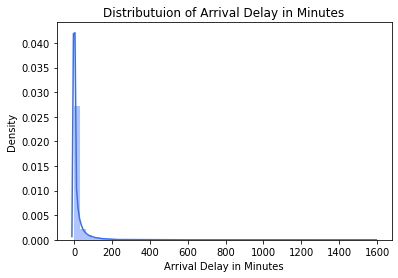

In [12]:
sns.set_palette("rainbow")
sns.distplot(train_data['Arrival Delay in Minutes'])
plt.title("Distributuion of Arrival Delay in Minutes")
plt.show()

In [13]:
# Убираем ненужные признаки
train_data = train_data.drop(['Unnamed: 0','id'], axis=1)

In [14]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [15]:
# Заменяем пропуски в поле Arrival Delay in Minutes нулями
train_data['Arrival Delay in Minutes'].fillna(0, inplace = True)

In [16]:
columns = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location',
            'Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service',
            'Baggage handling','Checkin service','Inflight service','Cleanliness']

for col in columns:
    train_data.loc[:,col] = train_data.loc[:,col].astype('object')

In [17]:
numerical_features =train_data.select_dtypes(include=np.number).columns.to_list()
numerical_features

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [18]:
categorical_features = train_data.select_dtypes(exclude=np.number).columns.to_list()
categorical_features

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

**Анализ признаков.**

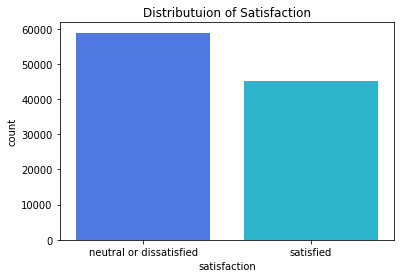

neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64


In [19]:
# Целевая переменная satisfaction

sns.countplot(x ='satisfaction', data = train_data)
plt.title("Distributuion of Satisfaction")
plt.show()

print((train_data['satisfaction'].value_counts()/len(train_data['satisfaction']))*100)

Датасет достаточно сбалансирован, можно не использовать ресемплинг.

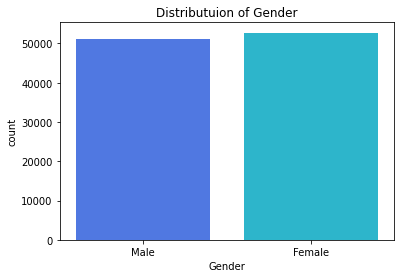

Female    50.745881
Male      49.254119
Name: Gender, dtype: float64


In [20]:
# Признак Gender
sns.countplot(x ='Gender', data = train_data)
plt.title("Distributuion of Gender")
plt.show()

print((train_data['Gender'].value_counts()/len(train_data['Gender']))*100)

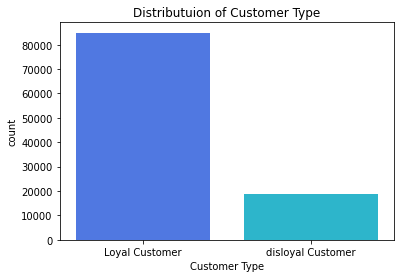

Loyal Customer       81.732176
disloyal Customer    18.267824
Name: Customer Type, dtype: float64


In [21]:
# Признак Customer type
sns.countplot(x ='Customer Type', data = train_data)
plt.title("Distributuion of Customer Type")
plt.show()

print((train_data['Customer Type'].value_counts()/len(train_data['Customer Type']))*100)

В датасете преобладают лояльные клиенты, больше 80%.

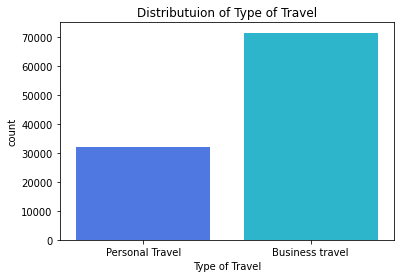

Business travel    68.962696
Personal Travel    31.037304
Name: Type of Travel, dtype: float64


In [22]:
# Признак Type of Travel
sns.countplot(x ='Type of Travel', data = train_data)
plt.title("Distributuion of Type of Travel")
plt.show()

print((train_data['Type of Travel'].value_counts()/len(train_data['Type of Travel']))*100)

В 68% случаев цель поездки - бизнес и только в 31% случаев по персональным причинам.

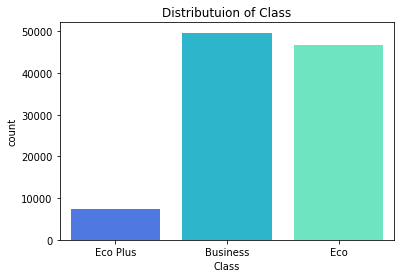

Business    47.798930
Eco         44.988643
Eco Plus     7.212427
Name: Class, dtype: float64


In [23]:
# Признак Class
sns.countplot(x ='Class', data = train_data)
plt.title("Distributuion of Class")
plt.show()

print((train_data['Class'].value_counts()/len(train_data['Class']))*100)

Преобладают пассажиры бизнес класса, чуть меньше Eco класс и всего 7% Eco Plus.

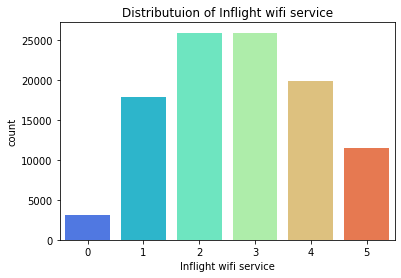

3    24.896058
2    24.859486
4    19.050277
1    17.169695
5    11.038074
0     2.986411
Name: Inflight wifi service, dtype: float64


In [24]:
# Признак Inflight wifi service
sns.countplot(x ='Inflight wifi service', data = train_data)
plt.title("Distributuion of Inflight wifi service")
plt.show()

print((train_data['Inflight wifi service'].value_counts()/len(train_data['Inflight wifi service']))*100)

Только в 3% случаев wi-fi на борту был недоступен.

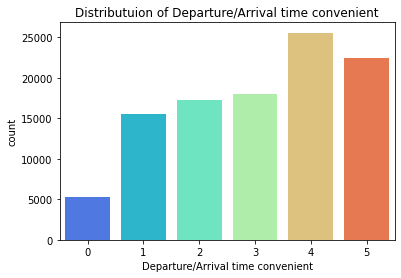

4    24.586156
5    21.561249
3    17.290961
2    16.545080
1    14.915691
0     5.100862
Name: Departure/Arrival time convenient, dtype: float64


In [25]:
# Признак Departure/Arrival time convenient
sns.countplot(x ='Departure/Arrival time convenient', data = train_data)
plt.title("Distributuion of Departure/Arrival time convenient")
plt.show()

print((train_data['Departure/Arrival time convenient'].value_counts()/len(train_data['Departure/Arrival time convenient']))*100)

Преобладают высокие оценки удобства прилетов/вылетов.

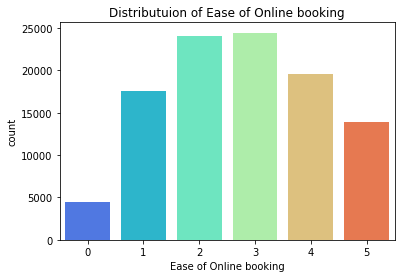

3    23.530374
2    23.118455
4    18.835656
1    16.866531
5    13.330574
0     4.318409
Name: Ease of Online booking, dtype: float64


In [26]:
# Признак Ease of Online booking
sns.countplot(x ='Ease of Online booking', data = train_data)
plt.title("Distributuion of Ease of Online booking")
plt.show()

print((train_data['Ease of Online booking'].value_counts()/len(train_data['Ease of Online booking']))*100)

Оценки распределены равномерно, с небольшим преобладанием средних оценок.

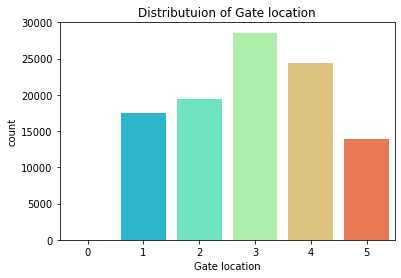

3    27.503272
4    23.508238
2    18.727864
1    16.902140
5    13.357522
0     0.000962
Name: Gate location, dtype: float64


In [27]:
# Признак Gate location
sns.countplot(x ='Gate location', data = train_data)
plt.title("Distributuion of Gate location")
plt.show()

print((train_data['Gate location'].value_counts()/len(train_data['Gate location']))*100)

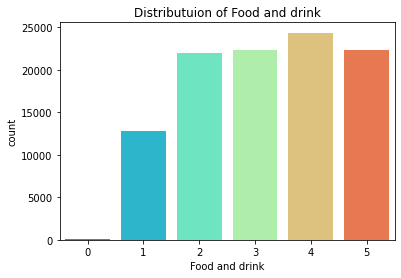

4    23.443756
5    21.474630
3    21.462119
2    21.161842
1    12.354674
0     0.102980
Name: Food and drink, dtype: float64


In [29]:
# Признак Food and drink
sns.countplot(x ='Food and drink', data = train_data)
plt.title("Distributuion of Food and drink")
plt.show()

print((train_data['Food and drink'].value_counts()/len(train_data['Food and drink']))*100)

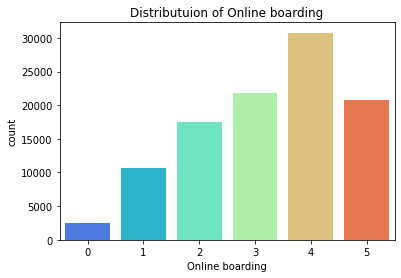

4    29.606175
3    20.984755
5    19.934747
2    16.847282
1    10.290268
0     2.336772
Name: Online boarding, dtype: float64


In [30]:
# Признак Online boarding
sns.countplot(x ='Online boarding', data = train_data)
plt.title("Distributuion of Online boarding")
plt.show()

print((train_data['Online boarding'].value_counts()/len(train_data['Online boarding']))*100)

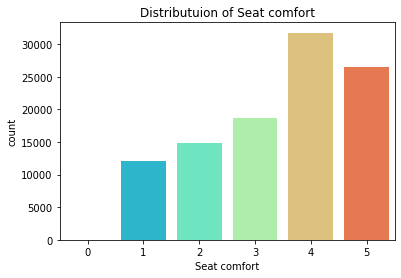

4    30.571489
5    25.475439
3    17.993532
2    14.337273
1    11.621304
0     0.000962
Name: Seat comfort, dtype: float64


In [31]:
# Признак Seat comfort
sns.countplot(x ='Seat comfort', data = train_data)
plt.title("Distributuion of Seat comfort")
plt.show()

print((train_data['Seat comfort'].value_counts()/len(train_data['Seat comfort']))*100)

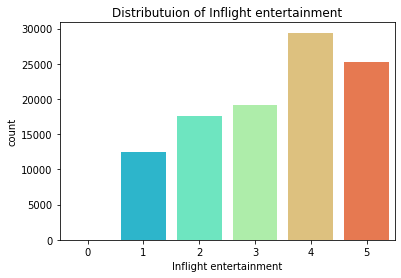

4    28.317485
5    24.265668
3    18.419888
2    16.974322
1    12.009162
0     0.013474
Name: Inflight entertainment, dtype: float64


In [33]:
# Признак Inflight entertainment
sns.countplot(x ='Inflight entertainment', data = train_data)
plt.title("Distributuion of Inflight entertainment")
plt.show()

print((train_data['Inflight entertainment'].value_counts()/len(train_data['Inflight entertainment']))*100)

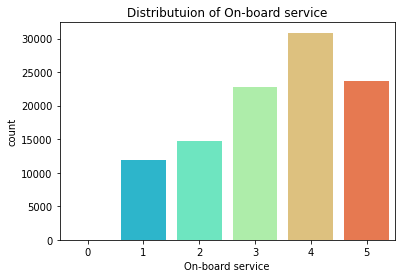

4    29.707230
5    22.759470
3    21.975092
2    14.129389
1    11.425932
0     0.002887
Name: On-board service, dtype: float64


In [34]:
# Признак On-board service
sns.countplot(x ='On-board service', data = train_data)
plt.title("Distributuion of On-board service")
plt.show()

print((train_data['On-board service'].value_counts()/len(train_data['On-board service']))*100)

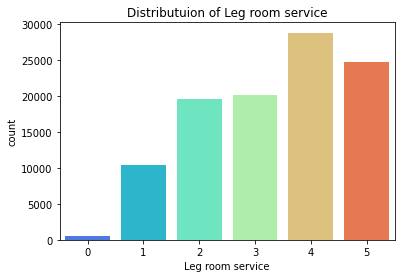

4    27.707307
5    23.740183
3    19.342855
2    18.791384
1     9.964005
0     0.454265
Name: Leg room service, dtype: float64


In [35]:
# Признак Leg room service
sns.countplot(x ='Leg room service', data = train_data)
plt.title("Distributuion of Leg room service")
plt.show()

print((train_data['Leg room service'].value_counts()/len(train_data['Leg room service']))*100)

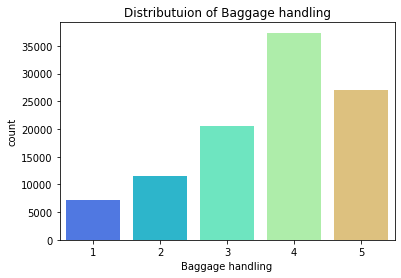

4    35.978403
5    26.111603
3    19.856791
2    11.088120
1     6.965083
Name: Baggage handling, dtype: float64


In [36]:
# Признак Baggage handling
sns.countplot(x ='Baggage handling', data = train_data)
plt.title("Distributuion of Baggage handling")
plt.show()

print((train_data['Baggage handling'].value_counts()/len(train_data['Baggage handling']))*100)

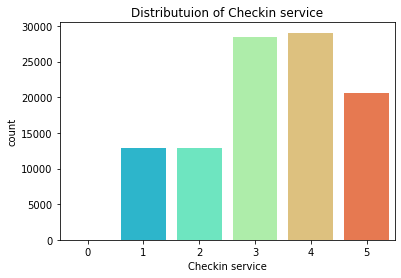

4    27.963312
3    27.377194
5    19.844279
2    12.408569
1    12.405682
0     0.000962
Name: Checkin service, dtype: float64


In [37]:
# Признак Checkin service
sns.countplot(x ='Checkin service', data = train_data)
plt.title("Distributuion of Checkin service")
plt.show()

print((train_data['Checkin service'].value_counts()/len(train_data['Checkin service']))*100)

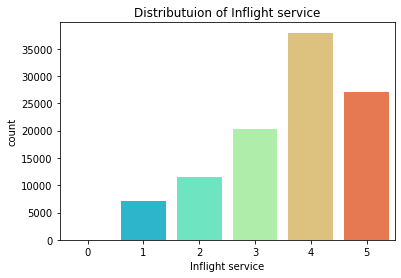

4    36.519287
5    26.097167
3    19.536303
2    11.026524
1     6.817832
0     0.002887
Name: Inflight service, dtype: float64


In [38]:
# Признак Inflight service
sns.countplot(x ='Inflight service', data = train_data)
plt.title("Distributuion of Inflight service")
plt.show()

print((train_data['Inflight service'].value_counts()/len(train_data['Inflight service']))*100)

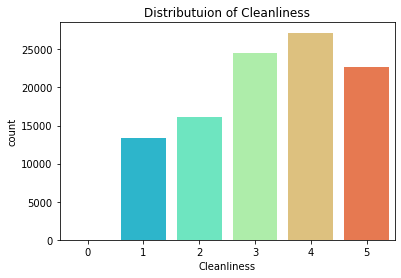

4    26.157800
3    23.650678
5    21.836503
2    15.525870
1    12.817601
0     0.011549
Name: Cleanliness, dtype: float64


In [39]:
# Признак Cleanliness
sns.countplot(x ='Cleanliness', data = train_data)
plt.title("Distributuion of Cleanliness")
plt.show()

print((train_data['Cleanliness'].value_counts()/len(train_data['Cleanliness']))*100)

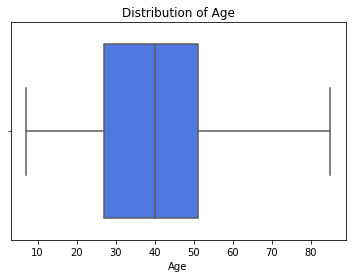

In [40]:
# Признак Age
sns.boxplot(x=train_data['Age'])
plt.title('Distribution of Age')
plt.show()

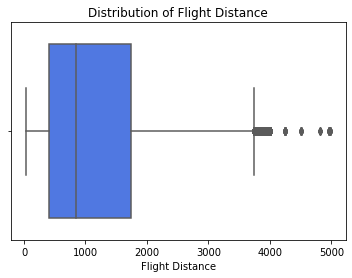

In [41]:
# Признак Flight Distance
sns.boxplot(x=train_data['Flight Distance'])
plt.title('Distribution of Flight Distance')
plt.show()

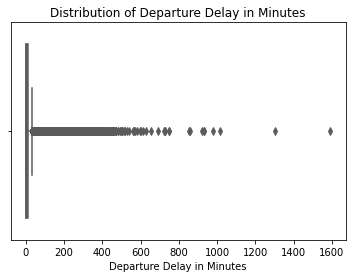

In [42]:
# Признак Departure Delay in Minutes
sns.boxplot(x=train_data['Departure Delay in Minutes'])
plt.title('Distribution of Departure Delay in Minutes')
plt.show()

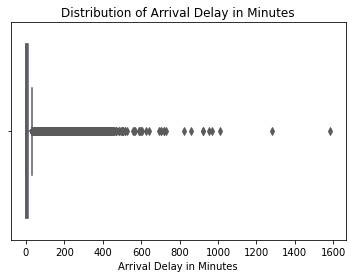

In [43]:
# Признак Arrival Delay in Minutes
sns.boxplot(x=train_data['Arrival Delay in Minutes'])
plt.title('Distribution of Arrival Delay in Minutes')
plt.show()